In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/Users/seohyeonlee/p-ollution/data/disease.csv',  header=[0], index_col=[0])
code_conversion = pd.read_csv('/Users/seohyeonlee/p-ollution/data/disease_code_conversion.csv', header=[0], index_col=[0])

code_name_dict = code_conversion.to_dict()['disease_name']
code_name_dict

{'J411': 'mucocorpulent chronic bronchitis',
 'I269': 'pulmonary embolism without mention of acute cor pulmonale',
 'J180': 'bronchopneumonia unspecifiied',
 'I693': 'sequelae of cerebral infraction',
 'I109': 'other and unspecified primary hypertension',
 'J340': 'abscess, furuncle, and carbuncle of nose'}

In [23]:
groupby_code = df.loc[df['region']=='Total'].groupby('disease_code').sum()

filter_condition =  [col for col in df.columns if 'len_hospital_stay' in col]
filtered_df = groupby_code[filter_condition].head()
filtered_df.columns

#

Index([' len_hospital_stay', ' len_hospital_stay.1', ' len_hospital_stay.2',
       ' len_hospital_stay.3', ' len_hospital_stay.4', ' len_hospital_stay.5',
       ' len_hospital_stay.6', ' len_hospital_stay.7', ' len_hospital_stay.8',
       ' len_hospital_stay.9', ' len_hospital_stay.10',
       ' len_hospital_stay.11', ' len_hospital_stay.12',
       ' len_hospital_stay.13', ' len_hospital_stay.14',
       ' len_hospital_stay.15', ' len_hospital_stay.16',
       ' len_hospital_stay.17', ' len_hospital_stay.18',
       ' len_hospital_stay.19', ' len_hospital_stay.20',
       ' len_hospital_stay.21', ' len_hospital_stay.22',
       ' len_hospital_stay.23', ' len_hospital_stay.24',
       ' len_hospital_stay.25', ' len_hospital_stay.26',
       ' len_hospital_stay.27', ' len_hospital_stay.28',
       ' len_hospital_stay.29', ' len_hospital_stay.30',
       ' len_hospital_stay.31', ' len_hospital_stay.32',
       ' len_hospital_stay.33', ' len_hospital_stay.34',
       ' len_hospital_sta

In [24]:
# Create a datetime index with a frequency of 'MS' (month start)
date_range = pd.date_range('2020-01', '2022-12', freq='MS')

# Extract year and month as strings in 'YYYY-MM' format
date_list = [date.strftime('%Y.%m') for date in date_range]

# Display the resulting list of datetime objects
print(date_list)

['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12']


In [25]:
filtered_df.columns = date_list
numpatients_by_disease = filtered_df.transpose()

numpatients_by_disease

disease_code,I109,I269,I693,J180,J340
2020.01,3887467,16259,41863,107264,56948
2020.02,3724489,12679,37541,65088,41924
2020.03,3796250,13983,40037,38928,31851
2020.04,3720591,13779,37155,27048,31519
2020.05,3843873,13373,37905,29113,30452
2020.06,3895894,13832,36914,31210,26451
2020.07,3923646,15102,32956,28993,24056
2020.08,3734263,14276,32184,25025,21306
2020.09,3988882,14407,31612,24728,31345
2020.10,3719846,14828,32049,28360,34447


In [33]:

def plot_numpatients(disease_code, axes, ax_idx):
    s = numpatients_by_disease[disease_code]
    s.index
    num_patients = s.values.astype('int')

    ym = pd.to_datetime(s.index)
    axes[ax_idx].plot(ym, num_patients, color='blue', linestyle='dashed',
     linewidth=2)
    axes[ax_idx].set_title(code_name_dict[disease_code])
   # axes[ax_idx].set_xlabel(code_name_dict[disease_code])

    #set title as disease name

    print('plotted ', disease_code)

/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_17265/4280418118.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_17265/4280418118.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_17265/4280418118.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_17265/4280418118.py:6: UserWarning: Could not infe

plotted  I109
plotted  I269
plotted  I693
plotted  J180
plotted  J340


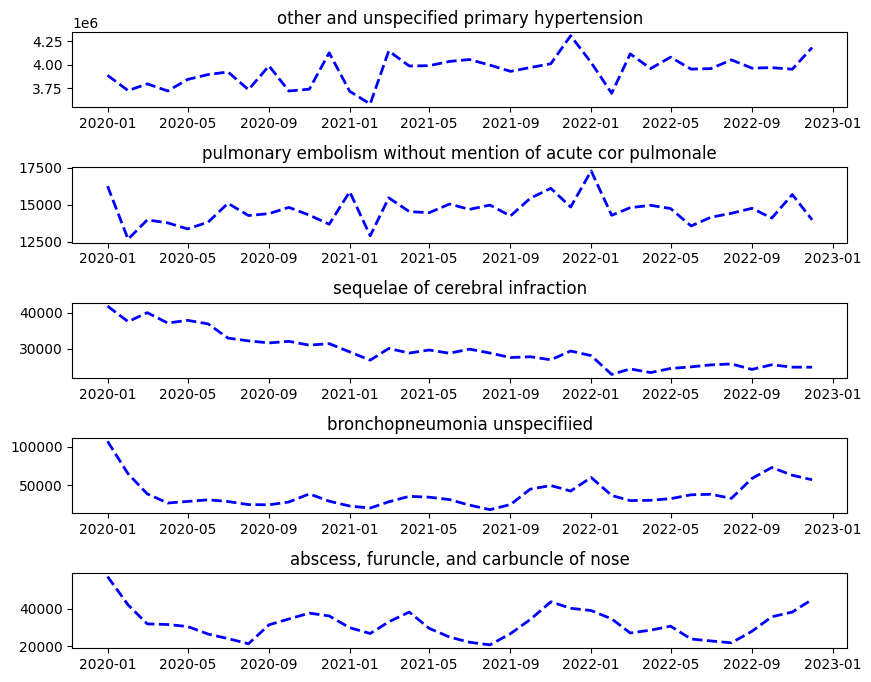

In [36]:
diseases = numpatients_by_disease.columns
fig, axes = plt.subplots(nrows=len(diseases), ncols=1, figsize=(10, 8))

for idx , item in enumerate(diseases):
    plot_numpatients(item, axes, idx)
plt.subplots_adjust(hspace=0.8)
    
    

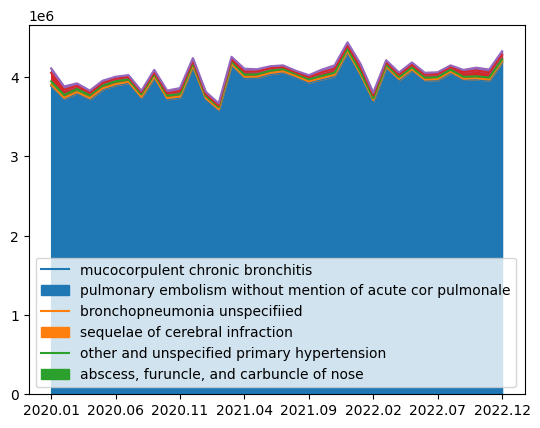

In [37]:
numpatients_by_disease.astype('int').plot.area()
plt.legend(labels=code_name_dict.values())
#I109 (hypertension) contributes a disproportionate number of patients

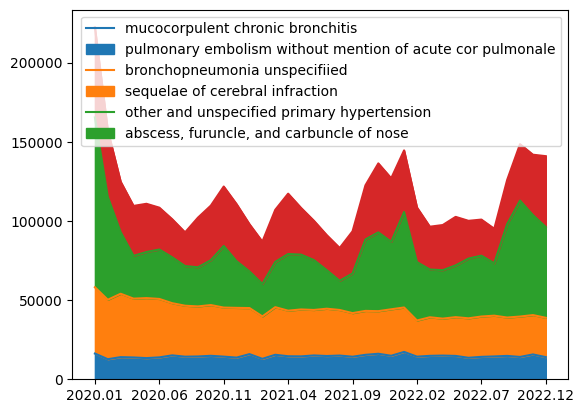

In [38]:
#stacked plot excluding I109 (hypertension)
numpatients_by_disease.astype('int').iloc[:, 1:].plot.area()
plt.legend(labels=code_name_dict.values())

#J180 (bronchopneumonia) cases dropped. lookk into precovid data